In [1]:
from pyspark.sql import SparkSession

In [2]:
packages = ["org.apache.spark:spark-streaming-kafka-0-10_2.12:3.0.1",
            "org.apache.spark:spark-sql-kafka-0-10_2.12:3.0.1"]
packages = ",".join(packages)

master = "spark://spark-master:7077"
appName = "sparkTest"

spark = SparkSession.builder \
                    .master(master) \
                    .appName(appName) \
                    .config("spark.jars.packages", packages) \
                    .config("spark.executor.memory", "512m") \
                    .config("spark.executor.core", "1") \
                    .getOrCreate()

spark

In [3]:

df = spark \
  .readStream \
  .format("kafka") \
  .option("kafka.bootstrap.servers", "localhost:9092, kafka:9093") \
  .option("subscribe", "test7") \
  .option("startingOffsets", "earliest") \
  .load()

In [4]:
from pyspark.sql.functions import col, udf, split, mean
from pyspark.sql import Row, DataFrame

In [5]:
value = df.select(col("value").cast("string").alias("Value"))
split_col = split(col("Value"), ",")

In [6]:
extract_task = value.select(split_col.getItem(1).cast("int").alias('pktTotalCount'),
                            split_col.getItem(2).cast("long").alias("flowStart"),
                            split_col.getItem(3).cast("int").alias("octetTotalCount"),
                            split_col.getItem(4).cast("int").alias("f_pktTotalCount"),
                            split_col.getItem(5).cast("int").alias("f_octetTotalCount"),
                            split_col.getItem(6).cast("long").alias("f_flowStart"),
                            split_col.getItem(7).cast("int").alias("b_pktTotalCount"),
                            split_col.getItem(8).cast("int").alias("b_octetTotalCount"),
                            split_col.getItem(9).cast("long").alias("b_flowStart"),
                            split_col.getItem(10).cast("string").alias("category"),
                            split_col.getItem(11).cast("string").alias("application_protocol"),
                            split_col.getItem(12).cast("string").alias("web_service"))

In [7]:
new_df = extract_task.select('pktTotalCount','flowStart','octetTotalCount','category','web_service') \
                         .writeStream \
                         .format("memory") \
                         .queryName("mean4") \
                         .outputMode("update") \
                         .start()

In [8]:
data = spark.sql("SELECT octetTotalCount FROM mean4")

In [9]:
!pip install pandas
!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation

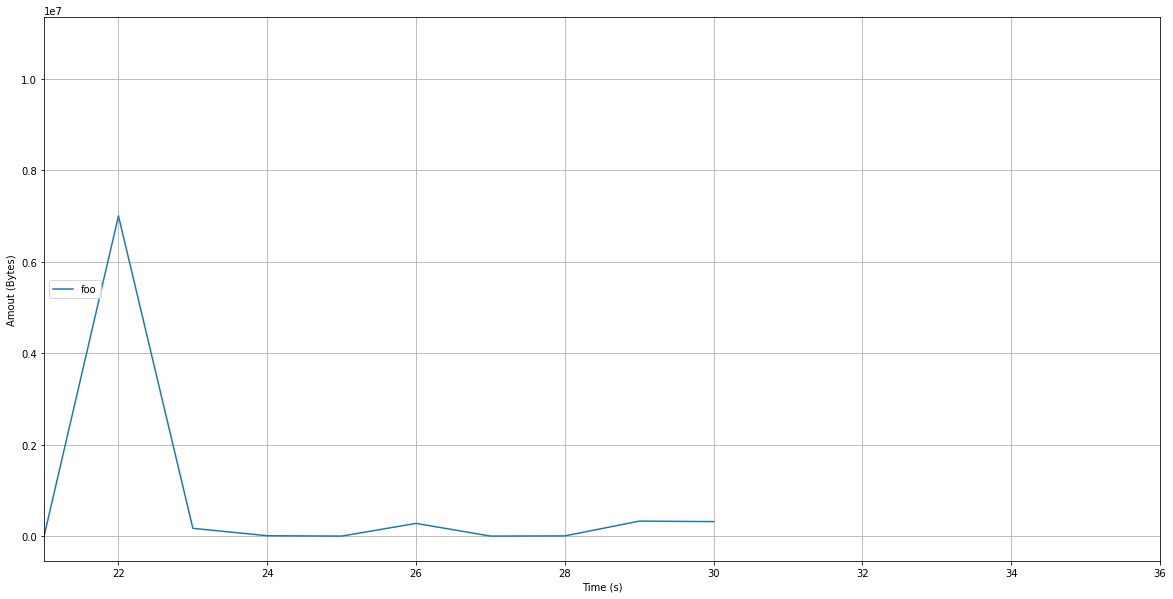

KeyboardInterrupt: 

In [29]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
import pandas as pd
import time
import numpy as np

def live_plot(data_dict,currentIndex = 0):
    clear_output(wait=True)
    plt.figure(figsize=(20,10))
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    x_left = max(0,currentIndex-10)
    x_right = x_left + 15
    plt.xlim(x_left,x_right)
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Amout (Bytes)')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();
data1 = {}
data1['foo'] = []
currentTime = 0
dataIndex = len(data.select("octetTotalCount").collect())
while(1):
    newIndex = len(data.select("octetTotalCount").collect())
    df = data.select("octetTotalCount").toPandas()
    currentTime += 1
    if(newIndex == dataIndex):
        nextV = 0
    else:
        nextV = df[dataIndex:newIndex].sum()
    
    data1['foo'].append(nextV)
    dataIndex = newIndex
    live_plot(data1,currentTime)
    time.sleep(0.5)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [79]:
def plot_bar(change,data):
    clear_output(wait=True)
    plt.figure(figsize=(20,10))
    if(change==True):
        plt.bar(data['octetTotalCount'].keys(),data['octetTotalCount'])
    else:
        plt.bar(['Google','Youtube','Facebook','Tweeter','HTTPS'],[0,0,0,0,0])
    plt.xlabel('Services')
    plt.ylabel('Amout (Bytes)')
    plt.legend(loc='upper left') # the plot evolves to the right
    plt.show();

In [32]:
# a = data.select("octetTotalCount").collect()
from pyspark.sql.functions import desc, asc

In [30]:
data = spark.sql("SELECT * FROM mean4")

In [33]:
data3 = data.groupBy("web_service").sum("octetTotalCount").orderBy(desc("sum(octetTotalCount)")).toPandas()

67


<AxesSubplot:xlabel='web_service'>

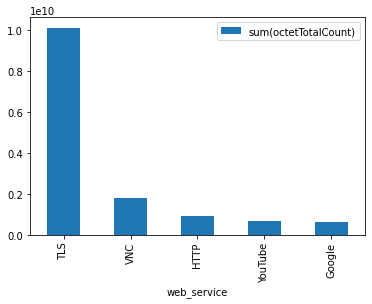

In [39]:
data_pd = data3[:min(5,data3.count()[0])]
data_pd.plot(kind = 'bar',x ='web_service')

No handles with labels found to put in legend.


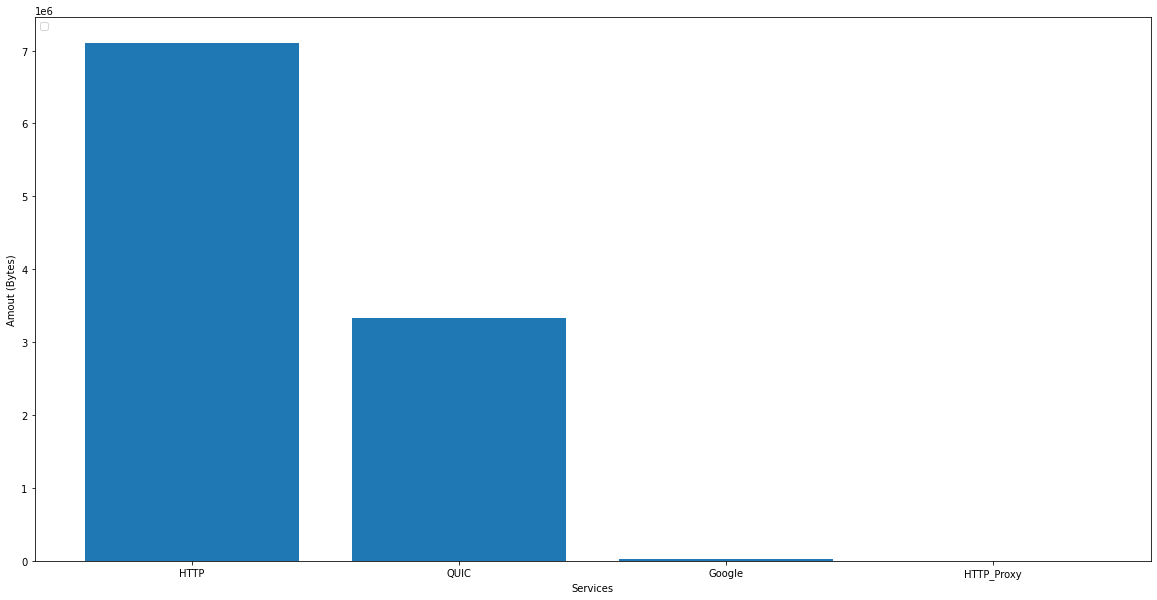

KeyboardInterrupt: 

In [80]:
dataIndex = len(data.select("octetTotalCount").collect())
changes = True
while True:
    clear_output(wait=True)
    newIndex = len(data.select("octetTotalCount").collect())
    if(dataIndex == newIndex):
        dataPd = pd.DataFrame(data=[[]])
        changes = False
    else:
        changes = True
        dataPd = data.select(['web_service','octetTotalCount']).toPandas()
        dataPd = dataPd[dataIndex:newIndex].groupby(['web_service']).sum().sort_values(by = ["octetTotalCount"],ascending=False)
        dataPd = dataPd[:min(5,dataPd.count()[0])]
    dataIndex = newIndex
    plot_bar(changes,dataPd)
    time.sleep(2)

In [78]:
dataPd = data.select(['web_service','octetTotalCount']).toPandas()
dataPd = dataPd[10:20].groupby(by = 'web_service').sum().sort_values(by = ["octetTotalCount"],ascending=False)
a = dataPd['octetTotalCount']
a.keys()[1]

'RTP'

In [45]:
dataPd = dataPd.groupby(['web_service']).sum()
dataPd

,octetTotalCount
web_service,
Amazon,35000085.0
AmazonVideo,4527883.0
Apple,481233.0
ApplePush,565296.0
AppleiCloud,226752.0
...,...
WindowsUpdate,13891439.0
Xbox,43365.0
Yahoo,389463.0


In [47]:
data3_pd

,web_service,sum(octetTotalCount)
30,Radius,3.600000e+02
40,PS_VUE,1.200000e+03
17,CiscoVPN,1.875000e+03
32,NTP,2.736000e+03
36,SNMP,3.780000e+03
...,...,...
18,YouTube,5.390277e+08
60,HTTP,6.734566e+08
29,VNC,1.133636e+09
25,TLS,6.383218e+09


In [52]:
web_service = data3_pd['web_service'].values
web_service

array(['Radius', 'PS_VUE', 'CiscoVPN', 'NTP', 'SNMP',
       'Unencrypted_Jabber', 'LDAP', 'Targus Dataspeed', 'MsSQL-TDS',
       'QQ', 'SSH', 'Xbox', 'RDP', 'MS_OneDrive', 'Steam', 'Syslog',
       'MQTT', 'SMTP', 'UbuntuONE', 'PlayStore', 'SMBv23', 'Instagram',
       'BitTorrent', 'STUN', 'IMAPS', 'Teredo', 'IRC', 'SIP',
       'AppleiCloud', 'ICMP', 'Yahoo', 'Apple', 'ApplePush', 'Skype',
       'Spotify', 'TeamViewer', 'NetFlix', 'LinkedIn', 'DHCP', 'MSN',
       'Messenger', 'DNS', 'Cloudflare', 'Facebook', 'NetBIOS',
       'GoogleDocs', 'AmazonVideo', 'GMail', 'GoogleServices',
       'Microsoft', 'Office365', 'WindowsUpdate', 'Amazon', 'HTTP_Proxy',
       'GoogleDrive', 'RTP', 'Unknown', 'QUIC', 'WhatsApp', 'Twitter',
       'Dropbox', 'Google', 'YouTube', 'HTTP', 'VNC', 'TLS',
       'web_service'], dtype=object)

In [57]:
data.write.csv("hdfs://hadoop-namenode:8020/data/data.csv")

In [58]:
df_10 = spark.read.csv("hdfs://hadoop-namenode:8020/data/data.csv")

In [59]:
df_10.show()

+---+----------+----+-----+------+
|_c0|       _c1| _c2|  _c3|   _c4|
+---+----------+----+-----+------+
|  6|1555953689| 372|  Web|   TLS|
|  6|1555953689| 372|  Web|   TLS|
|  6|1555953689| 372|  Web|   TLS|
|  6|1555953689| 372|  Web|   TLS|
|  6|1555953689| 372|  Web|   TLS|
|  6|1555953689| 372|  Web|   TLS|
| 26|1555953689|3145|  Web|  HTTP|
|  6|1555953689| 372|  Web|   TLS|
|  2|1555953689| 162|  Web|Google|
|  2|1555953689| 162|  Web|Google|
|  2|1555953689| 174|  Web|Google|
|  6|1555953690| 372|  Web|   TLS|
|  6|1555953690| 372|  Web|   TLS|
|  2|1555953690| 177|Email| GMail|
|  1|1555953690|  61|Email| GMail|
|  6|1555953690| 372|  Web|   TLS|
| 29|1555953690|6650|  Web|Google|
|  6|1555953690| 372|  Web|   TLS|
|  6|1555953690| 372|  Web|   TLS|
|  6|1555953690| 372|  Web|   TLS|
+---+----------+----+-----+------+
only showing top 20 rows

